In [1]:
import numpy as np
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='dark')

# In this notebooks we comapre the error rates, time and memory requirements for different simulation resolution, shape and data type.

### read data and assign column names

In [2]:
df = pd.read_csv('../../results/results_fft_all.csv')
df.columns = ['shape_name','sim_size','data_type','time_fftn','time_2D','time_1D','time_cpu','memory_density_fftn','memory_density_2D','memory_density_1D',
              'memory_fft_fftn','memory_fft_2D','memory_fft_1D','rel_error','rel_error_Sas','chi2']
df

,shape_name,sim_size,data_type,time_fftn,time_2D,time_1D,time_cpu,memory_density_fftn,memory_density_2D,memory_density_1D,memory_fft_fftn,memory_fft_2D,memory_fft_1D,rel_error,rel_error_Sas,chi2
0,cylinder,81,torch.complex128,0.012302,0.901286,5.116112,1.071922,0.007919,0.000098,1.430511e-06,0.021484,0.001953,0.001953,0.000577,1.999714,31920.710210
1,cylinder,81,torch.complex128,0.011238,1.270847,6.067171,0.964373,0.007919,0.000098,1.430511e-06,0.021484,0.001953,0.001953,0.000121,1.997270,1024.258904
2,cylinder,81,torch.complex128,0.020070,1.009532,5.368766,1.046274,0.007919,0.000098,1.430511e-06,0.021484,0.001953,0.001953,0.000219,1.999193,4095.449282
3,cylinder,81,torch.complex128,0.029811,1.149938,7.744730,0.836656,0.007919,0.000098,1.430511e-06,0.021484,0.001953,0.001953,0.000398,1.999630,23028.815110
4,cylinder,81,torch.complex64,0.030861,0.809503,5.660922,4.107013,0.003960,0.000049,9.536743e-07,0.021484,0.001953,0.001953,0.001291,1.999877,168296.787447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,sphere,945,torch.complex128,0.000000,272.882901,0.000000,275.365833,0.000000,0.013672,0.000000e+00,0.000000,0.029297,0.000000,NaN,0.711080,33.066094
252,sphere,945,torch.complex128,0.000000,249.184235,0.000000,191.712384,0.000000,0.013672,0.000000e+00,0.000000,0.029297,0.000000,NaN,0.343641,59.365760
253,sphere,945,torch.complex128,0.000000,327.630419,0.000000,258.203660,0.000000,0.013672,0.000000e+00,0.000000,0.029297,0.000000,NaN,0.461960,29.055813
254,sphere,945,torch.complex64,0.000000,272.238646,0.000000,279.484503,0.000000,0.006654,0.000000e+00,0.000000,0.021484,0.000000,NaN,1.168292,43.686213


In [3]:
colorscheme = {'fftn':np.array([230,97,1])/255, 
                '2D':np.array([94,60,153])/255, 
                '1D':np.array([178,171,210])/255, 
                'cpu':np.array([253,184,99])/255}

linestyle= {'sphere':'solid', 'hardsphere': 'dotted', 'cylinder':'dashed'}

# Analyze running time

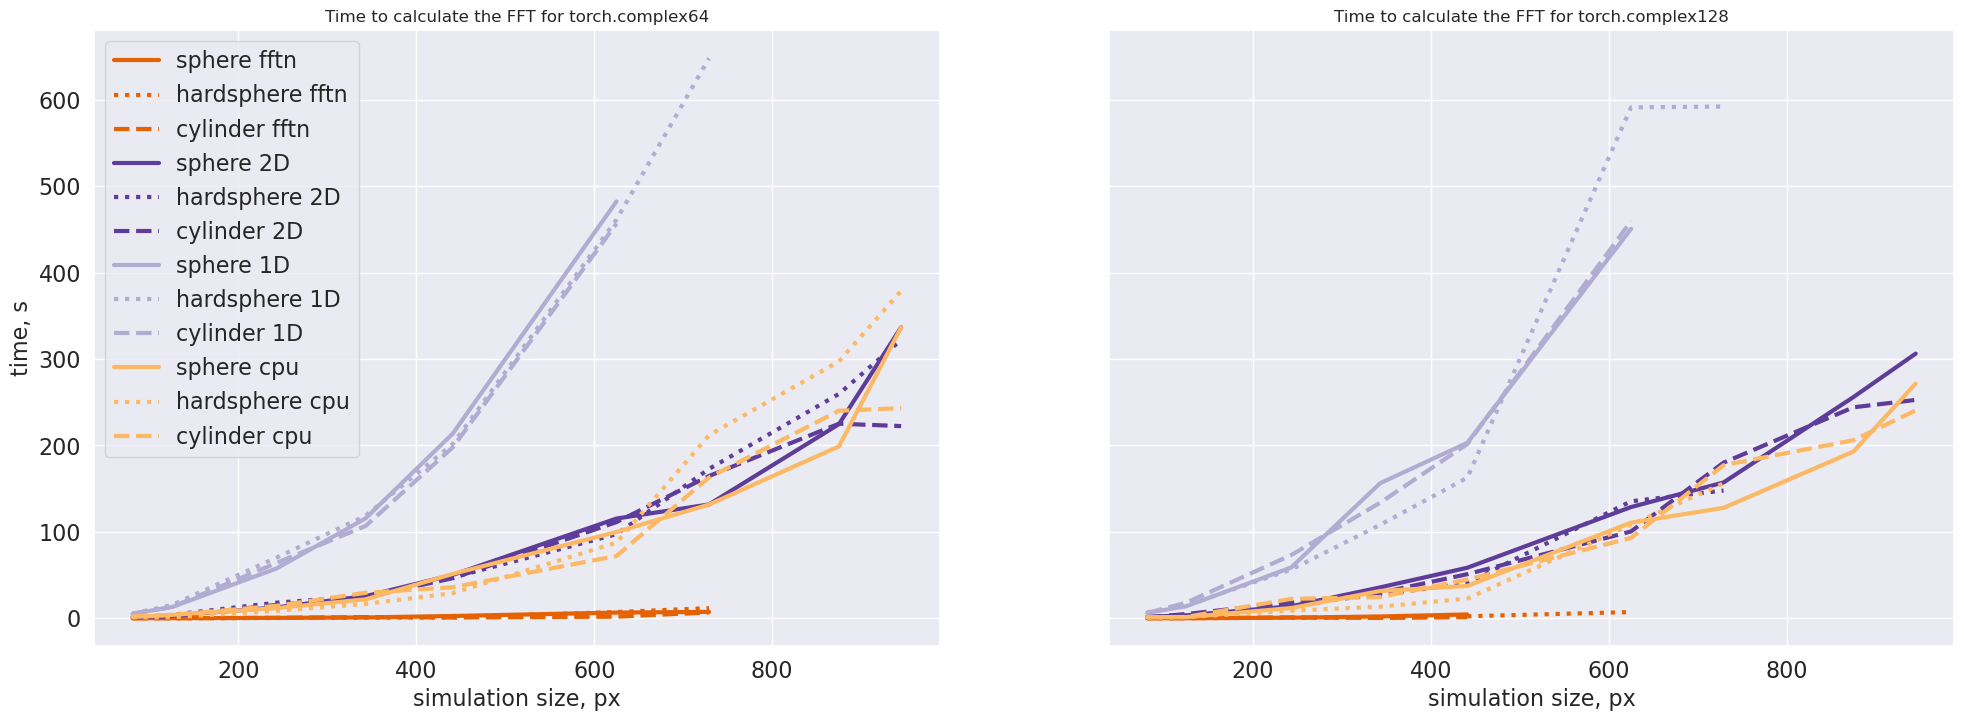

In [4]:
df_time = df[['shape_name', 'sim_size', 'data_type']+[i for i in df.columns if 'time' in i]]
df_time = df_time.groupby(['shape_name', 'sim_size','data_type']).mean()
df_time =df_time.reset_index().set_index('sim_size')


fig, axes = plt.subplots(1,2, figsize = (24,8), sharey = True)

for i, dtype in enumerate(['torch.complex64', 'torch.complex128']):
    for colname in [i for i in df.columns if 'time' in i]:
        for shape_name in ['sphere', 'hardsphere', 'cylinder']:
            subset_df = df_time[(df_time.shape_name == shape_name)&(df_time.data_type == dtype)]
            ax= axes[i]
            y = subset_df[colname].values
            x = subset_df.index.values[y!=0]
            ax.plot(x, y[y!=0], label = shape_name +' '+ colname.split('_')[1], lw = 3, linestyle = linestyle[shape_name], color = colorscheme[[i for i in colorscheme.keys() if colname.split('_')[1] == i][0] ])
    ax.tick_params(labelsize = 16)
    ax.tick_params(labelsize = 16)
    ax.set_xlabel('simulation size, px', fontsize=16)
    if i == 0:
        ax.legend(fontsize=16)
        ax.set_ylabel('time, s', fontsize=16)
    ax.set_title('Time to calculate the FFT for {}'.format(dtype))
    ax.grid()

plt.savefig('../../results/time_by_datatype.png')


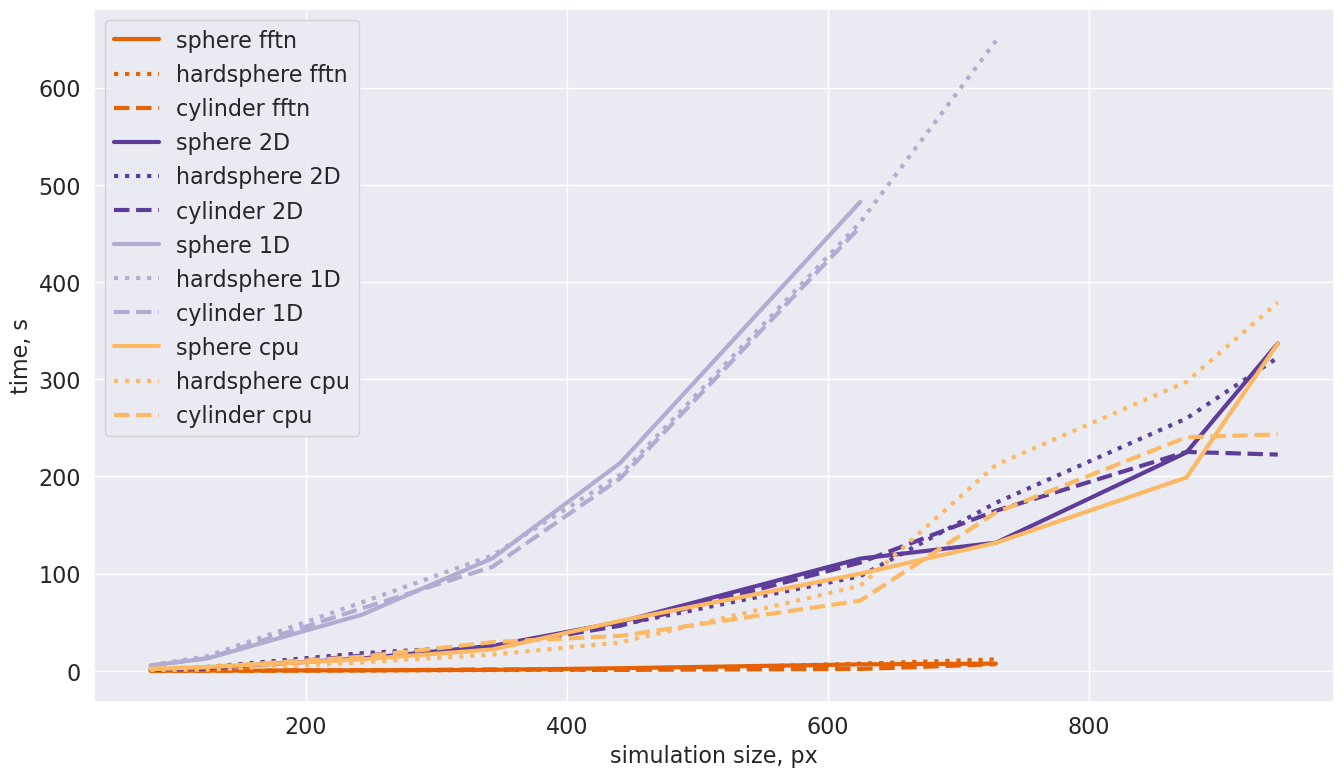

In [5]:
df_time = df[['shape_name', 'sim_size', 'data_type']+[i for i in df.columns if 'time' in i]]
df_time = df_time.groupby(['shape_name', 'sim_size','data_type']).mean()
df_time =df_time.reset_index().set_index('sim_size')


plt.figure(figsize = (16,9))

for colname in [i for i in df.columns if 'time' in i]:
    for shape_name in ['sphere', 'hardsphere', 'cylinder']:
        subset_df = df_time[(df_time.shape_name == shape_name)&(df_time.data_type == 'torch.complex64')]

        y = subset_df[colname].values
        x = subset_df.index.values[y!=0]
        plt.plot(x, y[y!=0], label = shape_name +' '+ colname.split('_')[1], lw = 3, linestyle = linestyle[shape_name], color = colorscheme[[i for i in colorscheme.keys() if colname.split('_')[1] == i][0] ])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('simulation size, px', fontsize=16)

plt.legend(fontsize=16)
plt.ylabel('time, s', fontsize=16)
plt.grid()

plt.savefig('../../results/time_32.png')

# Analyze Memory requirements

### to store the density and calculate FFT

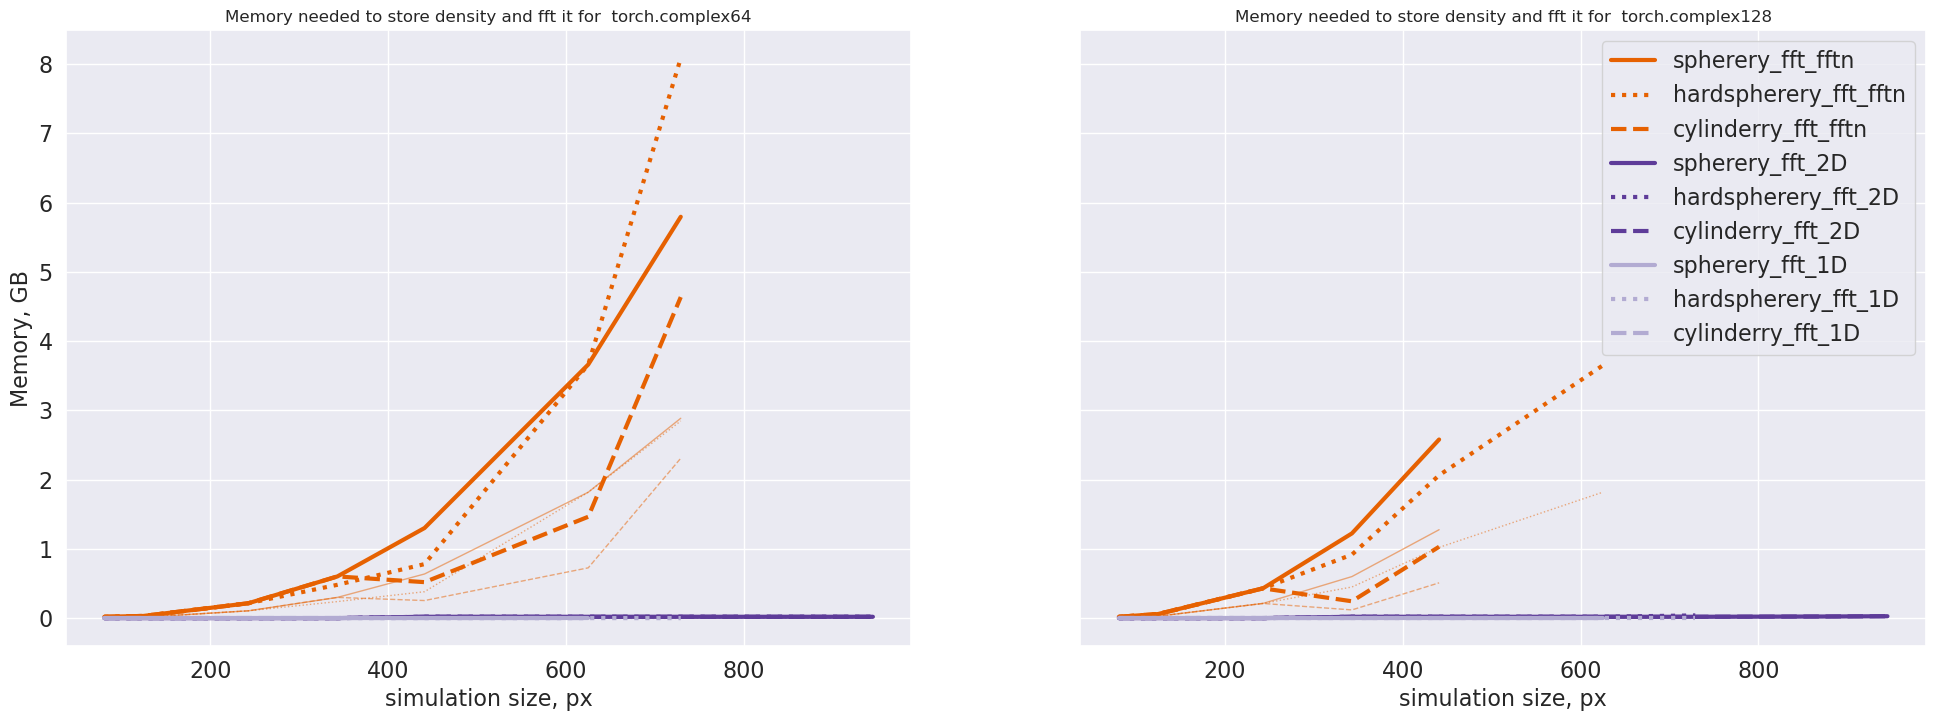

In [6]:
df_mem_density= df[['shape_name', 'sim_size', 'data_type']+[i for i in df.columns if 'density' in i]]
df_mem_density = df_mem_density.groupby(['shape_name', 'sim_size','data_type']).mean()
df_mem_density =df_mem_density.reset_index().set_index('sim_size')

fig, axes = plt.subplots(1,2, figsize = (24,8), sharey = True)

for i, dtype in enumerate(['torch.complex64', 'torch.complex128']):
    for colname in [i for i in df.columns if 'density' in i]:
        for shape_name in ['sphere', 'hardsphere', 'cylinder']:
            subset_df = df_mem_density[(df_mem_density.shape_name == shape_name)&(df_mem_density.data_type == dtype)]
            ax= axes[i]
            y = subset_df[colname].values
            x = subset_df.index.values[y!=0]
            ax.plot(x, y[y!=0], lw = 1, alpha = 0.5, linestyle = linestyle[shape_name], color = colorscheme[[i for i in colorscheme.keys() if colname.split('_')[2] == i][0] ])

df_fft_density= df[['shape_name', 'sim_size', 'data_type']+[i for i in df.columns if 'fft_' in i]]
df_fft_density = df_fft_density.groupby(['shape_name', 'sim_size','data_type']).mean()
df_fft_density =df_fft_density.reset_index().set_index('sim_size')
for i, dtype in enumerate(['torch.complex64', 'torch.complex128']):
    for colname in [i for i in df.columns if 'fft_' in i]:
        for shape_name in ['sphere', 'hardsphere', 'cylinder']:
            subset_df = df_fft_density[(df_fft_density.shape_name == shape_name)&(df_fft_density.data_type == dtype)]
            ax= axes[i]
            y = subset_df[colname].values
            x = subset_df.index.values[y!=0]
            ax.plot(x, y[y!=0], label = shape_name +colname[4:], lw = 3, linestyle = linestyle[shape_name], color = colorscheme[[i for i in colorscheme.keys() if colname.split('_')[2] == i][0] ])
    ax.tick_params(labelsize = 16)
    ax.tick_params(labelsize = 16)
    ax.set_xlabel('simulation size, px', fontsize=16)
    if i == 0:
        ax.set_ylabel('Memory, GB', fontsize=16)
    else:
        
        ax.legend(fontsize=16, loc = 'upper right')
    ax.set_title('Memory needed to store density and fft it for  {}'.format(dtype))
    ax.grid()
plt.savefig('../../results/memory.png')

Tried to extrapolate the curves, but seems to have to few points in it...  
the last curve slope is just continued 

In [7]:
fft_32 = interpolate.interp1d(df_fft_density[(df_fft_density.shape_name == 'sphere')& (df_fft_density.data_type == 'torch.complex64')].index.values[:-2], df_fft_density[(df_fft_density.shape_name == 'sphere')& (df_fft_density.data_type == 'torch.complex64')].memory_fft_fftn.values[:-2], fill_value = "extrapolate")
fft_64 = interpolate.interp1d(df_fft_density[(df_fft_density.shape_name == 'sphere')& (df_fft_density.data_type == 'torch.complex128')].index.values[:-2], df_fft_density[(df_fft_density.shape_name == 'sphere')& (df_fft_density.data_type == 'torch.complex64')].memory_fft_fftn.values[:-2], fill_value = "extrapolate")


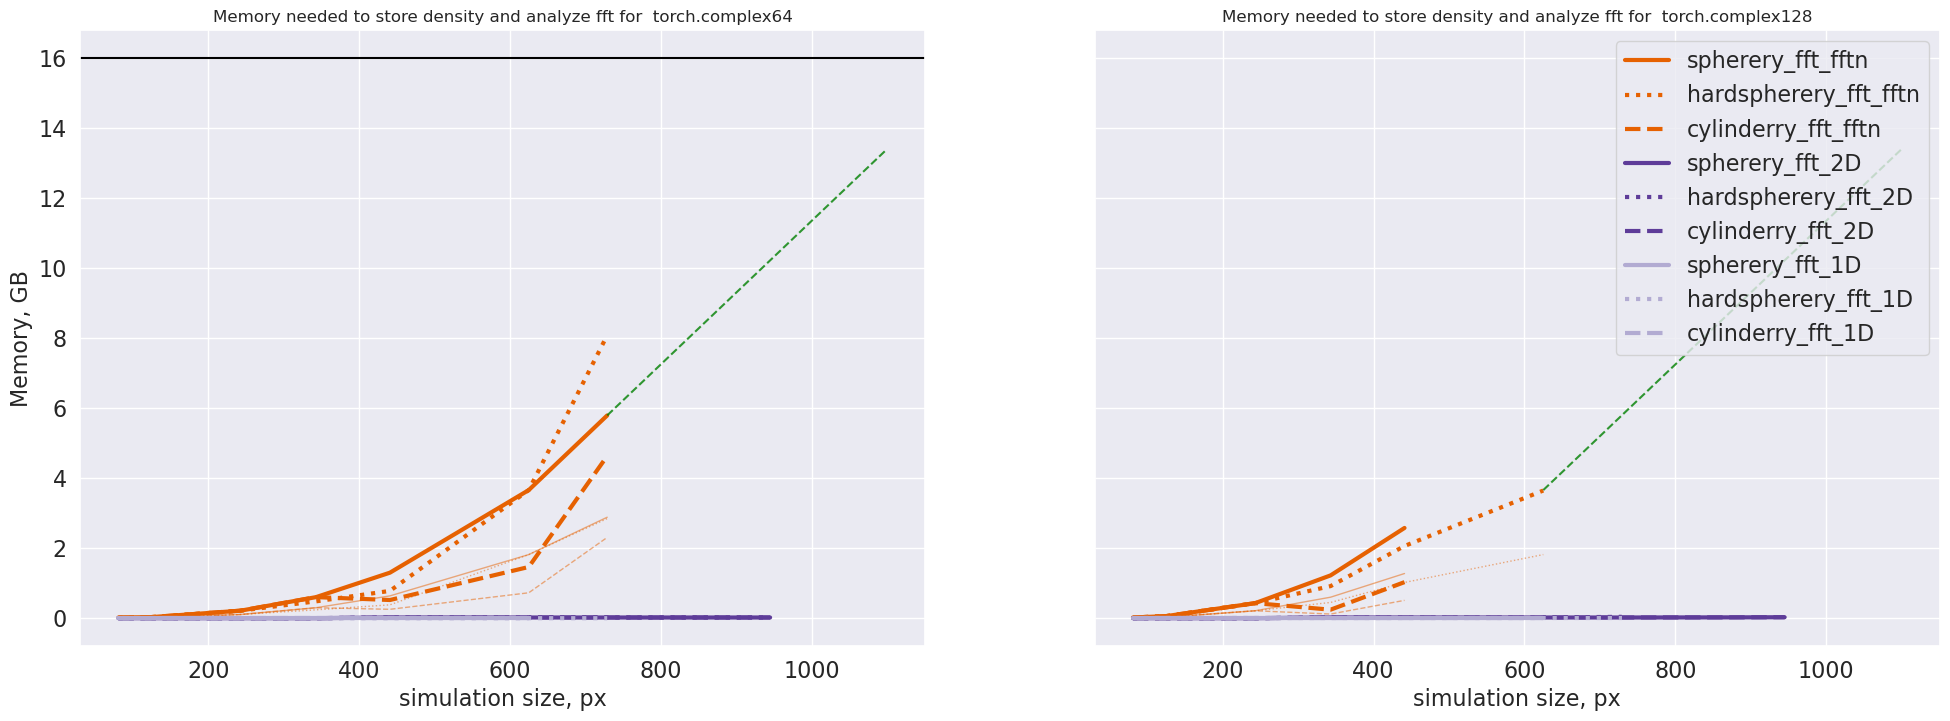

In [8]:

df_mem_density= df[['shape_name', 'sim_size', 'data_type']+[i for i in df.columns if 'density' in i]]
df_mem_density = df_mem_density.groupby(['shape_name', 'sim_size','data_type']).mean()
df_mem_density =df_mem_density.reset_index().set_index('sim_size')

fig, axes = plt.subplots(1,2, figsize = (24,8), sharey = True)

for i, dtype in enumerate(['torch.complex64', 'torch.complex128']):
    for colname in [i for i in df.columns if 'density' in i]:
        for shape_name in ['sphere', 'hardsphere', 'cylinder']:
            subset_df = df_mem_density[(df_mem_density.shape_name == shape_name)&(df_mem_density.data_type == dtype)]
            ax= axes[i]
            y = subset_df[colname].values
            x = subset_df.index.values[y!=0]
            ax.plot(x, y[y!=0], lw = 1, alpha = 0.5, linestyle = linestyle[shape_name], color = colorscheme[[i for i in colorscheme.keys() if colname.split('_')[2] == i][0] ])

df_fft_density= df[['shape_name', 'sim_size', 'data_type']+[i for i in df.columns if 'fft_' in i]]
df_fft_density = df_fft_density.groupby(['shape_name', 'sim_size','data_type']).mean()
df_fft_density =df_fft_density.reset_index().set_index('sim_size')
for i, dtype in enumerate(['torch.complex64', 'torch.complex128']):
    for colname in [i for i in df.columns if 'fft_' in i]:
        for shape_name in ['sphere', 'hardsphere', 'cylinder']:
            subset_df = df_fft_density[(df_fft_density.shape_name == shape_name)&(df_fft_density.data_type == dtype)]
            ax= axes[i]
            y = subset_df[colname].values
            x = subset_df.index.values[y!=0]
            ax.plot(x, y[y!=0], label = shape_name +colname[4:], lw = 3, linestyle = linestyle[shape_name], color = colorscheme[[i for i in colorscheme.keys() if colname.split('_')[2] == i][0] ])
    ax.tick_params(labelsize = 16)
    ax.tick_params(labelsize = 16)
    ax.set_xlabel('simulation size, px', fontsize=16)
    if i == 0:
        ax.set_ylabel('Memory, GB', fontsize=16)
    else:
        
        ax.legend(fontsize=16, loc = 'upper right')
    ax.set_title('Memory needed to store density and analyze fft for  {}'.format(dtype))
    ax.grid()
axes[0].plot( [729,875,945,1000,1100], [fft_32(i) for i in [729,875,945,1000,1100]], '--',color = 'green',alpha=0.8 , label='extrapolated')
axes[1].plot( [625, 729,875,945,1000,1100], [fft_64(i) for i in [625, 729,875,945,1000,1100]], '--',color = 'green',alpha=0.8 , label='extrapolated')
axes[0].axhline(y = 16, xmin = 0, xmax = 1100, color = 'black')


# Finally analyze the error rates

In [9]:
cp =  [np.array([27,158,119])/255,np.array([217,95,2])/255,np.array([117,112,179])/255]

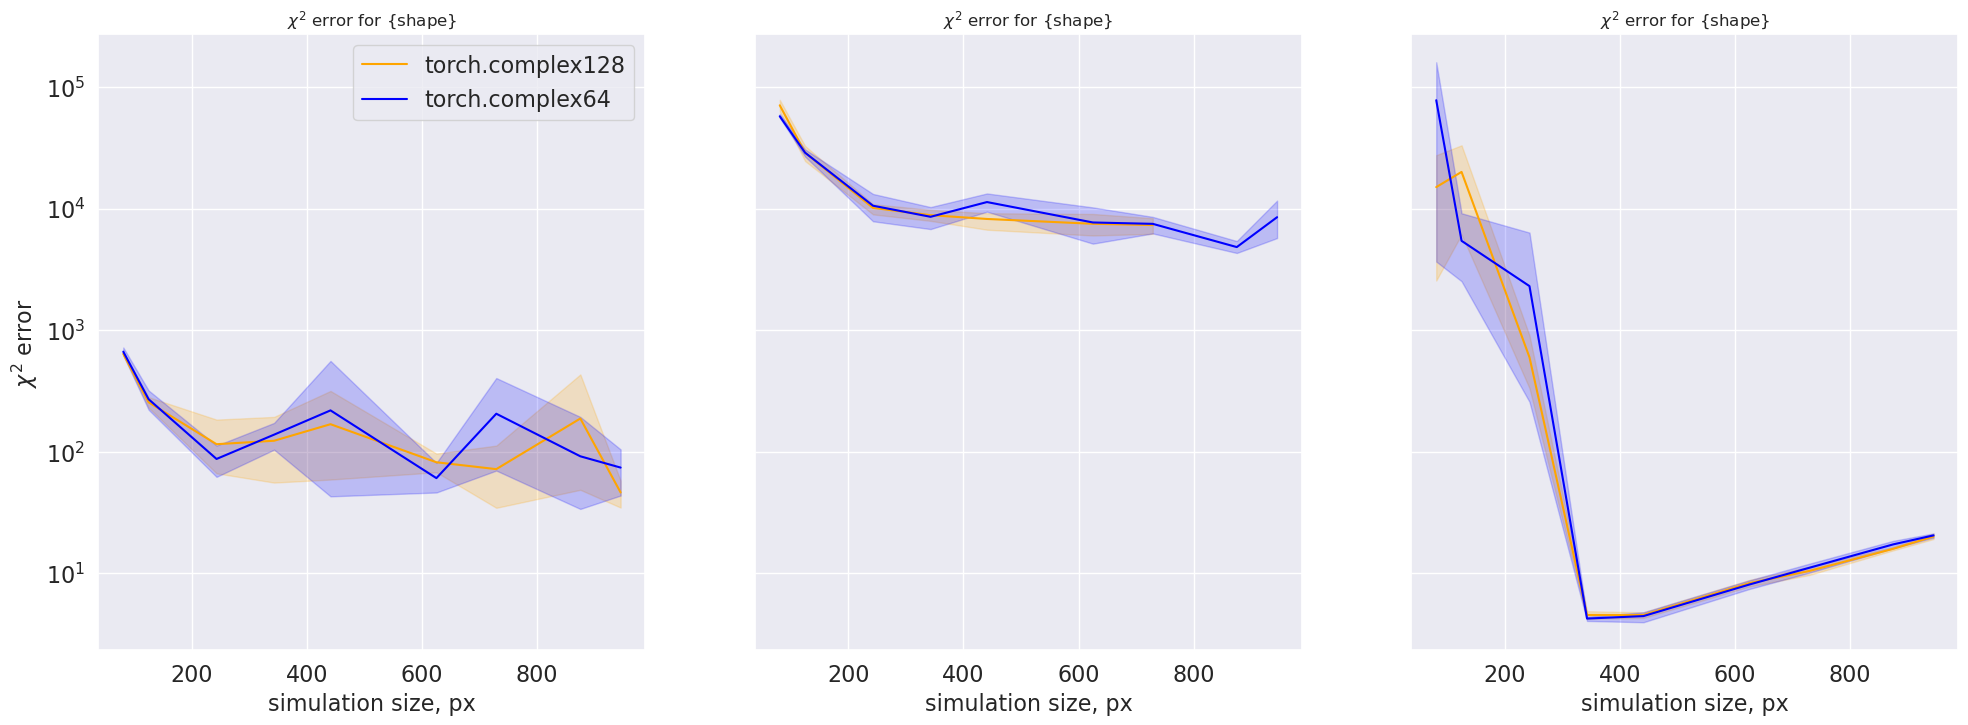

In [10]:

fig, axes = plt.subplots(1,3, figsize = (24,8), sharey = True)

for i, shape in enumerate(['sphere', 'hardsphere', 'cylinder']):
    ax = axes[i]
    sns.lineplot( data = df[(df.shape_name == shape)][['data_type','sim_size', 'chi2']], x = 'sim_size', y = 'chi2', hue = 'data_type', palette =['orange', 'blue'], ax=ax)
    ax.tick_params(labelsize = 16)
    ax.tick_params(labelsize = 16)
    ax.set_ylabel(r'$\chi^2$ error' , fontsize=16)
    ax.set_xlabel('simulation size, px', fontsize=16)
    
    
    if i==0:
        ax.legend(fontsize=16, loc = 'upper right')
    else:
        ax.get_legend().remove()
    ax.set_title(r'$\chi^2$ error for {shape}')
    ax.grid()
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')

plt.savefig('../../results/Chi_error_by_shape.png')

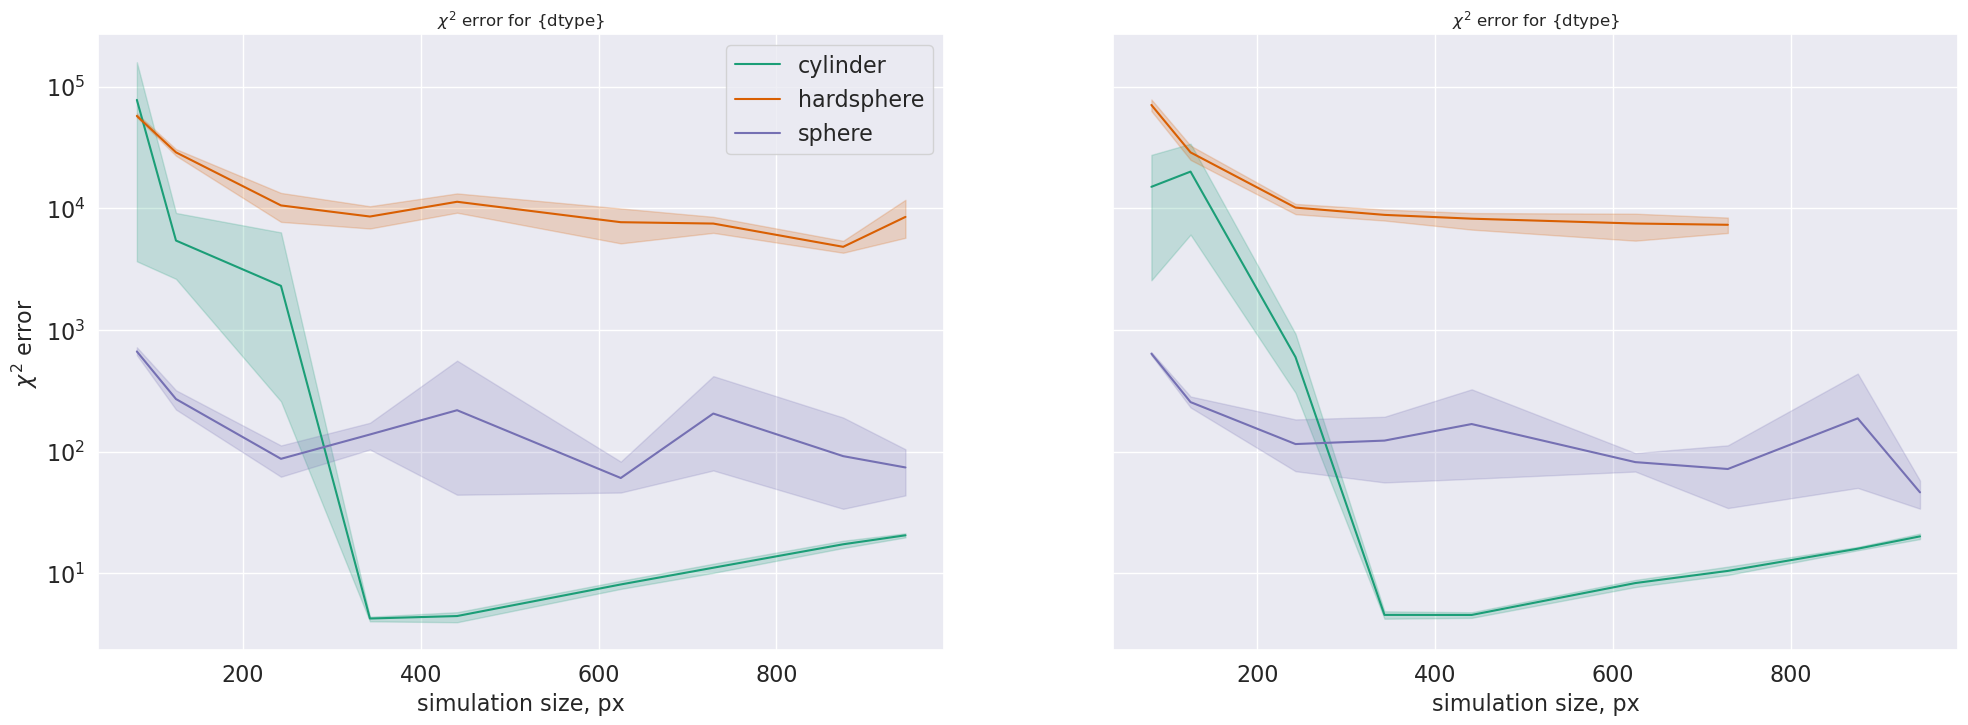

In [11]:

fig, axes = plt.subplots(1,2, figsize = (24,8), sharey = True)

for i, dtype in enumerate(['torch.complex64', 'torch.complex128']):
    ax = axes[i]
    sns.lineplot( data=df[(df.data_type == dtype)][['shape_name','sim_size', 'chi2']].sort_values(by = 'shape_name'), x="sim_size", y="chi2", hue = 'shape_name', palette =cp, ax=ax)
    ax.tick_params(labelsize = 16)
    ax.tick_params(labelsize = 16)
    ax.set_ylabel(r'$\chi^2$ error' , fontsize=16)
    ax.set_xlabel('simulation size, px', fontsize=16)

    
    if i==0:
        ax.legend(fontsize=16, loc = 'upper right')
    else:
        ax.get_legend().remove()
    ax.set_title(r'$\chi^2$ error for {dtype}')
    ax.grid()
axes[0].set_yscale('log')
axes[1].set_yscale('log')

plt.savefig('../../results/Chi_error_by_datatype.png')


## single precision

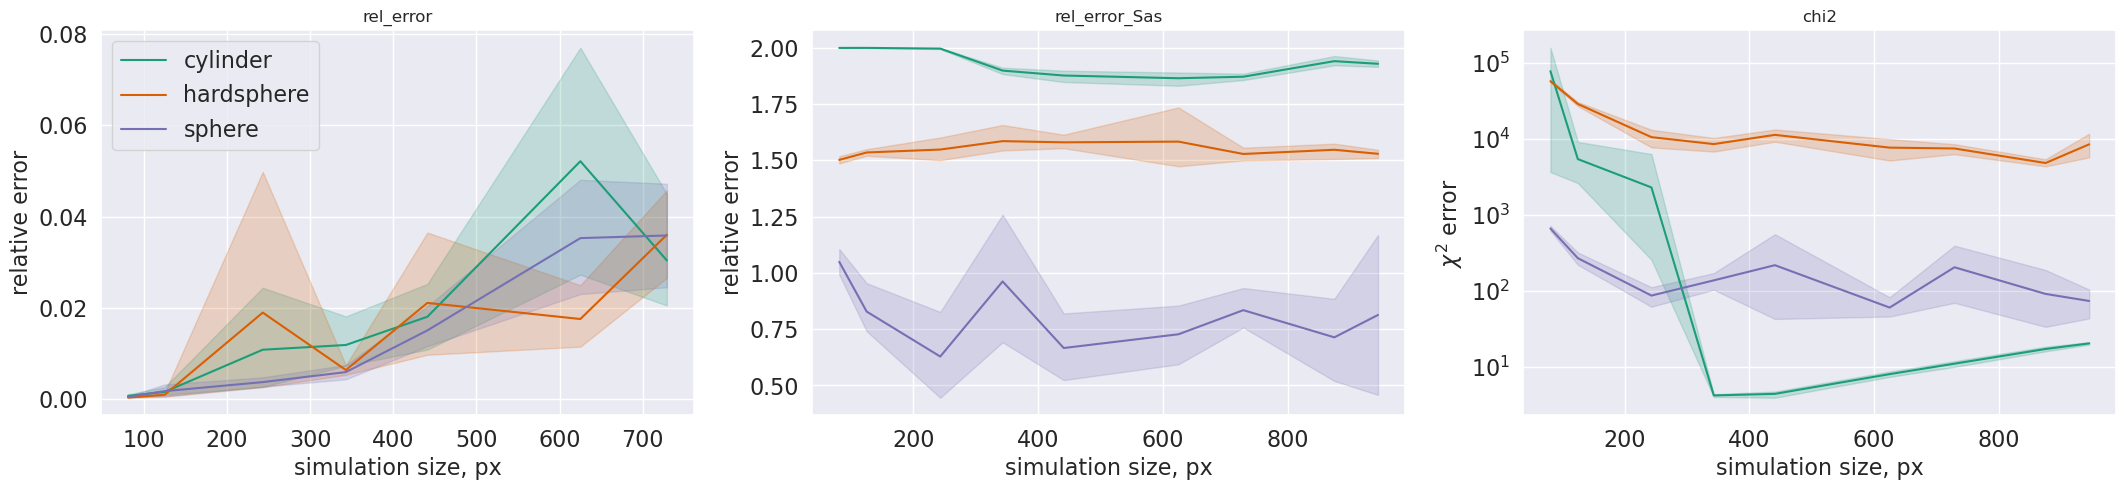

In [12]:


fig, axes = plt.subplots(1,3, figsize = (26,5), sharey = False)
dtype = 'torch.complex64'
errors = ['rel_error', 'rel_error_Sas', 'chi2']
for i, er in enumerate(errors):
    ax = axes[i]
    sns.lineplot( data=df[(df.data_type == dtype)][['shape_name','sim_size', er]].sort_values(by = 'shape_name'), x="sim_size", y=er, hue = 'shape_name', palette =cp, ax=ax)
    ax.tick_params(labelsize = 16)
    ax.tick_params(labelsize = 16)
    if er == 'chi2':
        ax.set_ylabel(r'$\chi^2$ error' , fontsize=16)
        ax.set_yscale('log')
    else:
        ax.set_ylabel('relative error' , fontsize=16)
    ax.set_xlabel('simulation size, px', fontsize=16)
    if i==0:
        ax.legend(fontsize=16, loc = 'upper left')
    else:
        ax.get_legend().remove()
    ax.set_title(f'{er}')
    ax.grid()

plt.savefig('../../results/errors_32.png')

## double precision

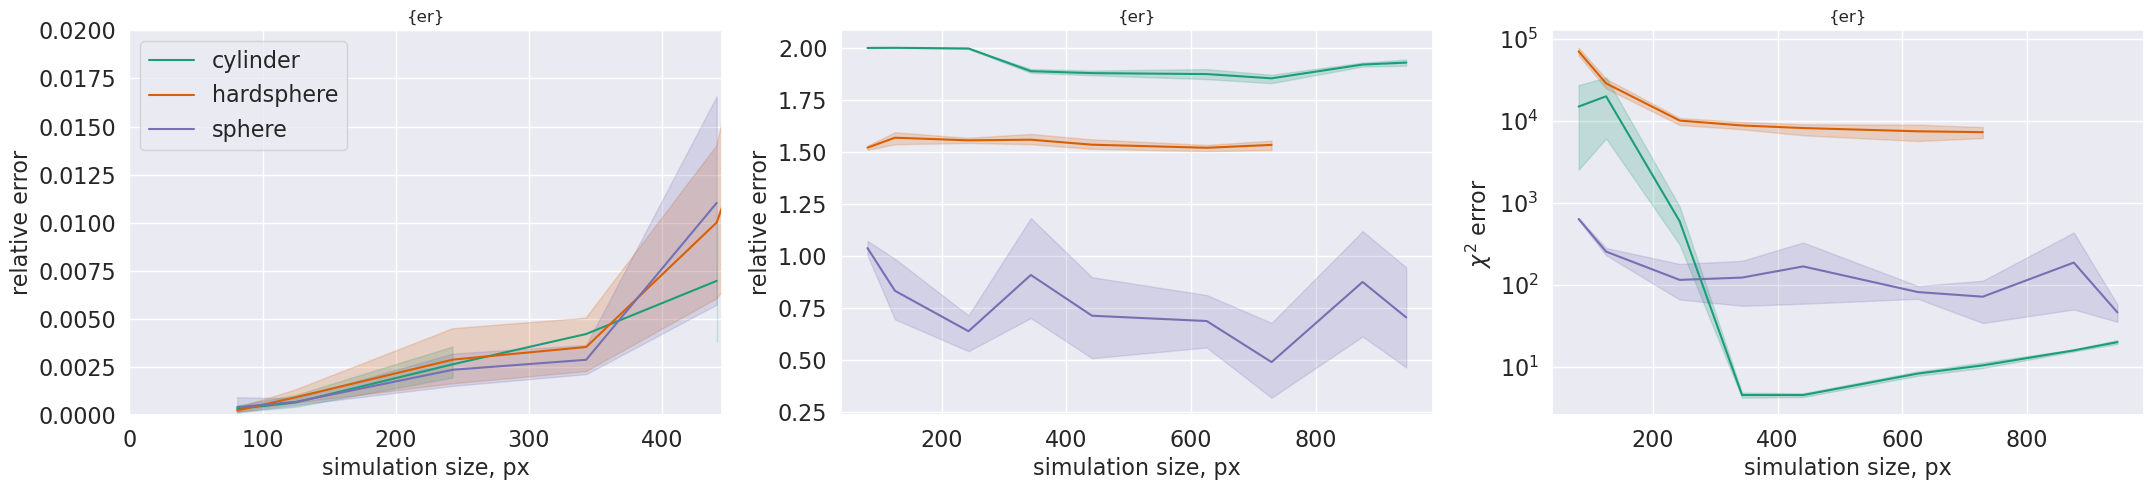

In [13]:

fig, axes = plt.subplots(1,3, figsize = (26,5), sharey = False)
dtype = 'torch.complex128'
errors = ['rel_error', 'rel_error_Sas', 'chi2']
for i, er in enumerate(errors):
    ax = axes[i]
    sns.lineplot( data=df[(df.data_type == dtype)][['shape_name','sim_size', er]].sort_values(by = 'shape_name'), x="sim_size", y=er, hue = 'shape_name', palette =cp, ax=ax)
    ax.tick_params(labelsize = 16)
    ax.tick_params(labelsize = 16)
    if i ==0:
        ax.set_xlim([0, 445])
        ax.set_ylim([0, 0.02])
    if er == 'chi2':
        ax.set_ylabel(r'$\chi^2$ error' , fontsize=16)
        ax.set_yscale('log')
    else:
        ax.set_ylabel('relative error' , fontsize=16)
    ax.set_xlabel('simulation size, px', fontsize=16)
    
    if i==0:
        ax.legend(fontsize=16, loc = 'upper left')
    else:
        ax.get_legend().remove()
    ax.set_title('{er}')
    ax.grid()
plt.savefig('../../results/errors_64.png')


## For the table

In [14]:
errors = df[['shape_name', 'sim_size', 'data_type','rel_error', 'rel_error_Sas', 'chi2']]

In [15]:
errors_new = errors.groupby(['shape_name', 'sim_size', 'data_type']).mean()

In [16]:
def join_error(e):
    e = e.to_list()
    if len(e)==1:
        error_string = "{e1:.4f}/{e0}".format(e1 = e[0], e0 = np.nan)
    else:
        error_string = "{e1:.4f}/{e0:.4f}".format(e1 = e[1], e0 = e[0])
    return  error_string

def join_error_chi(e):
    e = e.to_list()
    if len(e)==1:
        error_string = "{e1:.0f}/{e0}".format(e1 = e[0], e0 = np.nan)
    else:
        error_string = "{e1:.0f}/{e0:.0f}".format(e1 = e[1], e0 = e[0])
    return  error_string

In [17]:
output = errors_new.reset_index().groupby(['shape_name', 'sim_size']).agg({'rel_error':join_error,'rel_error_Sas':join_error,'chi2':join_error_chi})
output.to_csv('../../results/errors_per_shape.csv')

In [18]:
print(output.to_latex()) # for thesis

\begin{tabular}{lllll}
\toprule
       &     &      rel\_error &  rel\_error\_Sas &         chi2 \\
shape\_name & sim\_size &                &                &              \\
\midrule
cylinder & 81  &  0.0007/0.0003 &  1.9990/1.9990 &  77814/15017 \\
       & 125 &  0.0016/0.0007 &  1.9991/1.9995 &   5430/20024 \\
       & 243 &  0.0108/0.0027 &  1.9960/1.9963 &     2304/599 \\
       & 343 &  0.0119/0.0042 &  1.8983/1.8872 &          4/5 \\
       & 441 &  0.0181/0.0070 &  1.8764/1.8779 &          4/5 \\
       & 625 &     0.0521/nan &  1.8644/1.8734 &          8/8 \\
       & 729 &     0.0304/nan &  1.8711/1.8530 &        11/10 \\
       & 875 &        nan/nan &  1.9403/1.9191 &        17/16 \\
       & 945 &        nan/nan &  1.9285/1.9284 &        21/20 \\
hardsphere & 81  &  0.0004/0.0002 &  1.5018/1.5200 &  57430/70669 \\
       & 125 &  0.0010/0.0009 &  1.5347/1.5678 &  28821/28807 \\
       & 243 &  0.0190/0.0029 &  1.5477/1.5552 &  10558/10131 \\
       & 343 &  0.0064/0.0035

/tmp/ipykernel_3410/2813442779.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(output.to_latex()) # for thesis


# Now analyze results of different $\chi^2$ errors based on type of the uncertainty

In [19]:
df_chi = pd.read_csv('../../results/results_chi.csv', header = None)
df_chi.columns = ['shape_name', 'sim_size', 'chi2_Istd', 'chi2_ISEM', 'chi2_ISigma', 'chi2_IError']

In [20]:
colorscheme = {'Istd':np.array([230,97,1])/255, 
                'ISEM':np.array([94,60,153])/255, 
                'ISigma':np.array([178,171,210])/255, 
                'IError':np.array([253,184,99])/255}

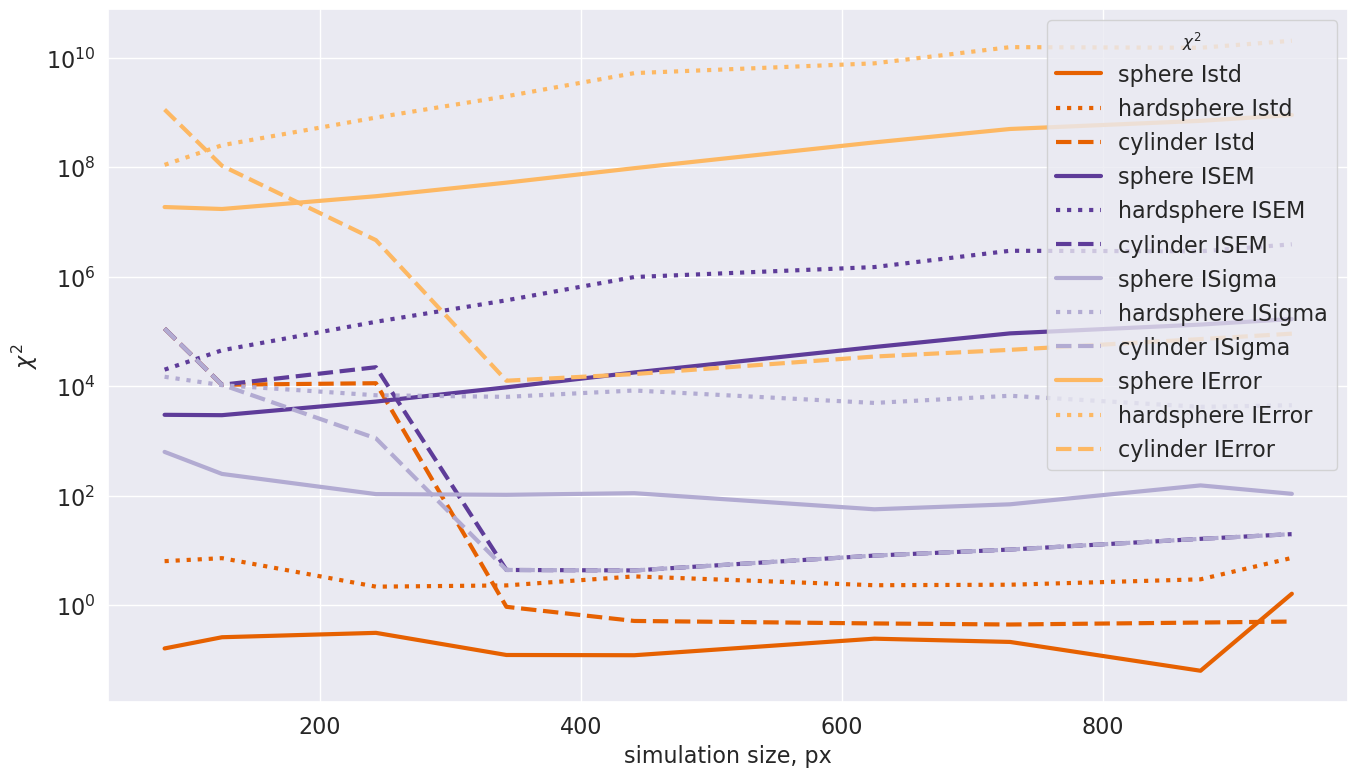

In [21]:
df_chi = df_chi.groupby(['shape_name', 'sim_size']).mean()
df_chi =df_chi.reset_index().set_index('sim_size')


plt.figure(figsize = (16,9))

for colname in ['chi2_Istd', 'chi2_ISEM', 'chi2_ISigma', 'chi2_IError']:
    for shape_name in ['sphere', 'hardsphere', 'cylinder']:
        subset_df = df_chi[(df_chi.shape_name == shape_name)]
        y = subset_df[colname].values
        x = subset_df.index.values[y!=0]
        plt.plot(x, y[y!=0], label = shape_name +' '+ colname.split('_')[1], lw = 3, linestyle = linestyle[shape_name], color = colorscheme[[i for i in colorscheme.keys() if colname.split('_')[1] == i][0] ])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.yscale('log')
plt.xlabel('simulation size, px', fontsize=16)

plt.legend(fontsize=16, title = r'$\chi^2$', loc = 'upper right')
plt.ylabel(r'$\chi^2$', fontsize=16)
plt.grid()

plt.savefig('../../results/Chi_uncertainty.png')